In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargamos nuestro dataset
df = pd.read_csv('games_clean.csv', sep=',')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_expanded,platform_group
0,WII SPORTS,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54,Everyone,Nintendo
1,SUPER MARIO BROS,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Pending,Nintendo
2,MARIO KART WII,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52,Everyone,Nintendo
3,WII SPORTS RESORT,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77,Everyone,Nintendo
4,POKEMON RED/POKEMON BLUE,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Pending,Nintendo


In [3]:
# Inspeccionamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16444 non-null  float64
 12  rating_expanded  16444 non-null  object 
 13  platform_group   16444 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


*Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?*

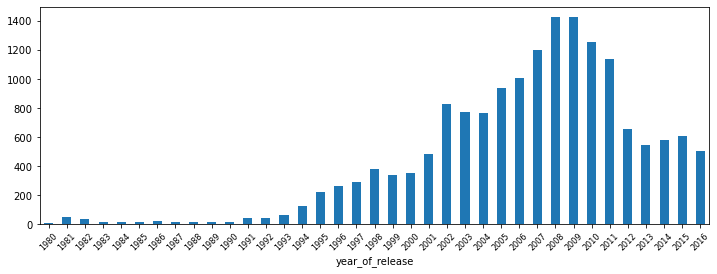

In [4]:
games_by_year = df.groupby('year_of_release')['name'].count()
plt.figure(figsize=(12,4))
plt.xticks(fontsize=8)
games_by_year.plot(
    x = 'year_of_release',
    kind='bar',
    rot = 45
)
plt.show()

#### Consideramos que desde 1995 los datos comienzan a ser significativos. Antes de esta fecha fueron muy pocos los juegos que había en el mercado

*Observa cómo varían las ventas de una plataforma a otra.*

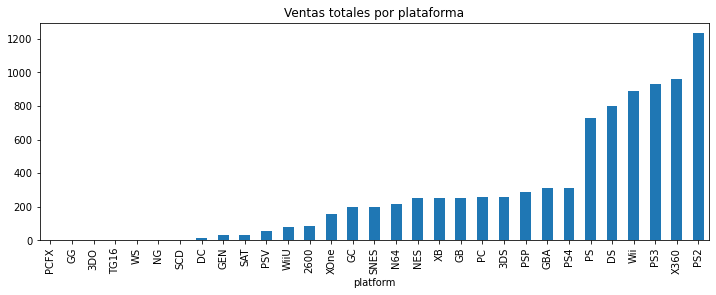

In [5]:
# Plataformas individuales con mayores ventas totales

df_by_sales_platform = df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales')
df_by_sales_platform.plot(
    x = 'platform',
    figsize = (12,4),
    kind = 'bar',
    legend = False,
    title = 'Ventas totales por plataforma'
)

plt.show()

#### Las plataformas que más ventas totales han tenido hasta la fecha del estudio son PS2, X360, PS3, Wii, DS y PS

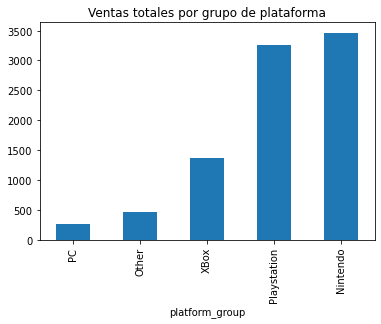

In [6]:
# Grupos de plataformas con mayores ventas totales

df_by_sales_platform_group = df.groupby('platform_group')['total_sales'].sum().reset_index().sort_values(by='total_sales')
df_by_sales_platform_group.plot(
    kind = 'bar',
    x = 'platform_group',
    title = 'Ventas totales por grupo de plataforma',
    legend = False
)
plt.show()

#### Agrupando las plataformas en las compañías detrás de cada plataforma podemos ver que Playstation y Nintendo liderean el mercado

In [7]:
# Ordenamos dataframe por ventas totales
all_platforms_sales = df_by_sales_platform.sort_values(by='total_sales', ascending = False)

# Creamos lista de todas las plataformas
all_platforms_sales_list = df['platform'].unique().tolist()
all_platforms_sales_list

#Agrupamos por año y plataforma
all_yearly_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()


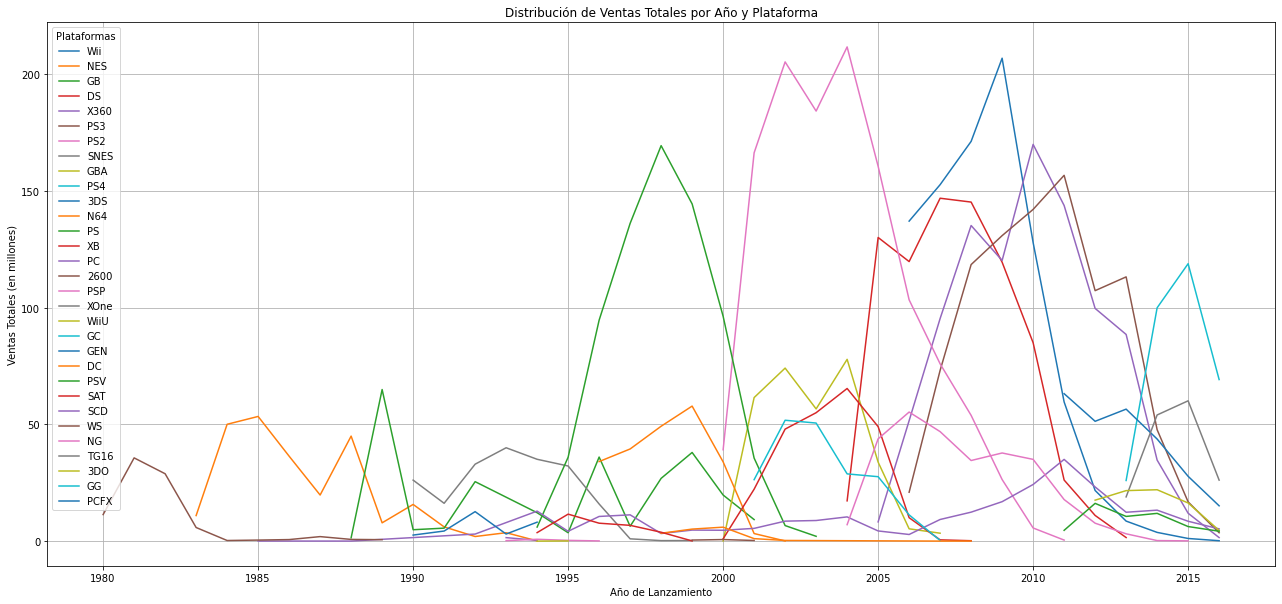

In [8]:
# Crear un gráfico de líneas para comparar todas las plataformas
plt.figure(figsize=(22, 10))

for platform in all_platforms_sales_list:
    platform_data = all_yearly_sales[all_yearly_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Distribución de Ventas Totales por Año y Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Plataformas')
plt.grid(True)
plt.show()


In [9]:
# Seleccionamos las plataformas con más ventas
top_sales_platforms = all_platforms_sales.head(7)
top_sales_list = top_sales_platforms['platform'].tolist() 
print(f'Top 6 platforms: {top_sales_list}')

Top 6 platforms: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']


In [10]:
# Filtramos el dataframe original por las top 6 plataformas

top_sales_df = df[df['platform'].isin(top_sales_list)]

# Agrupar por año y plataforma
yearly_sales = top_sales_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

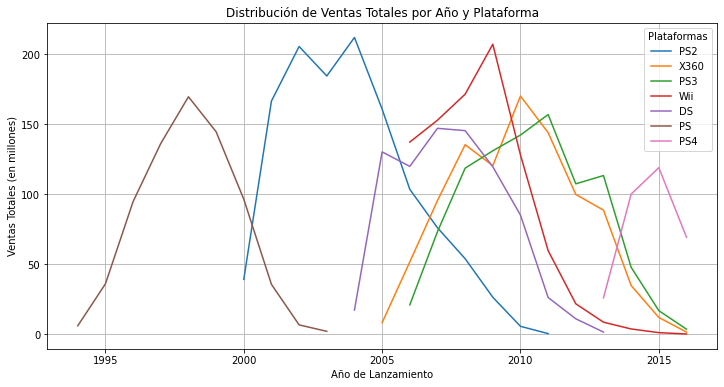

In [11]:
# Crear un gráfico de líneas para comparar las top 6 plataformas
plt.figure(figsize=(12, 6))

for platform in top_sales_list:
    platform_data = yearly_sales[yearly_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Distribución de Ventas Totales por Año y Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Plataformas')
plt.grid(True)
plt.show()


#### Analizando nuestro top de ventas, vemos que la vida promedio de una plataforma es de aproximadamente 10 años y cada 10 años aproximadamente nace una nueva plataforma popular.
#### Wii y PS2 han llegado a picos de venta que las otras no han tenido, aún así han sido remplazadas en ventas por otras plataformas.
#### Añadimos a PS4 para ver su comportamiento porque a pesar de que está en el top 7, es de las plataformas nuevas que están teniendo un repunte. 

*Determina para qué período debes tomar datos.* 

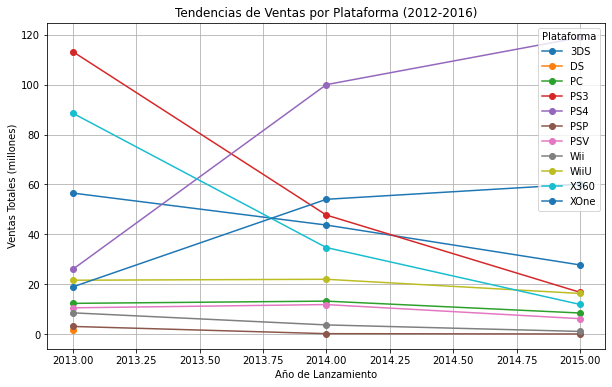

In [12]:
# Filtramos los datos para tener los datos de los últimos 4 años

filter_2012_2016 = df[ 
    (df['year_of_release'] >= 2013) &
    (df['year_of_release'] <= 2015) 
]

sales_2012_2016 = filter_2012_2016.groupby(['year_of_release','platform'])['total_sales'].sum().unstack()

# Crear el gráfico de tendencias de ventas
plt.figure(figsize=(10, 6))
for platform in sales_2012_2016.columns:
    plt.plot(sales_2012_2016.index, sales_2012_2016[platform], marker='o', label=platform)

plt.title('Tendencias de Ventas por Plataforma (2012-2016)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

In [13]:
sales_2012_2016.loc[2015].sort_values(ascending=False)


platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
DS         NaN
Name: 2015, dtype: float64

#### Tomando en cuenta el crecimiento de las plataformas del 2013 al 2015, vemos cuáles van en caída y cuáles van en ascenso.
#### Las dos plataformas que vemos en ascenso, y son líderes en venta, son PS4 con delantera por mucho, seguida de XOne.
#### Y ya en descenso leve tenemos a 3DS, luego en descenso más empinado, a PS3 y X360. 
#### Y por último, y manteniéndose en menos ventas, estables, Wii2, PC, PSV, Wii Y PSP.

#### Creemos que las plataformas potencialmente rentables son PS4 y XOne definitivamente. Y de ahí, en menor medida 3DS, PS3, WiiU y X360

#### Nota: descartamos las ventas hechas hasta el 2015 porque parece que las del 2016 no están completas.. si estamos haciendo análisis para el 2017 debe ser porque 2016 no ha terminado y por eso los datos de venta de ese año están tan bajos.

## Diagrama de caja para las ventas globales, desglosados por plataforma. 


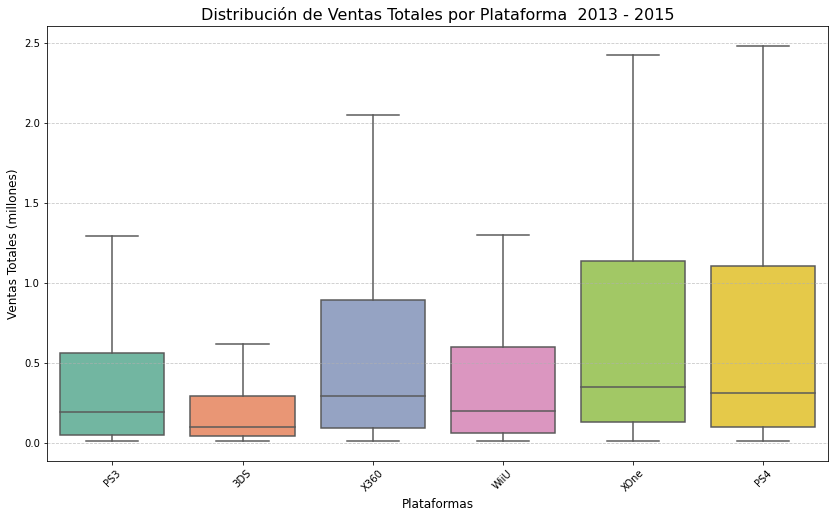

In [14]:
# boxplot de ventas globales de PS4
top5 = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']
sales_top = df[(df['platform'].isin(top5)) & (df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2015)].sort_values(by='total_sales', ascending=True)


# Crear el boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=sales_top, x='platform', y='total_sales', palette='Set2', showfliers=False) #escondemos valores atípicos

# Personalizar el gráfico
plt.title('Distribución de Ventas Totales por Plataforma  2013 - 2015', fontsize=16)
plt.xlabel('Plataformas', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si son muchas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




#### Nota: Los boxplots están mostrados sin valores atípicos ya que eran varios, en todas. Aún así vemos que hay sesgos hacia arriba. No hay gran diferencia entre las medias y verificaremos si hubiera diferencia significativa entre ellas.

In [15]:
# Analizamos si hay diferencias entre los promedios de las ventas totales de las  3 principales plataformas

from scipy.stats import f_oneway

# Ventas por plataforma (top 3 plataformas)
ps4_sales = sales_top[sales_top['platform'] == 'PS4']['total_sales']
xone_sales = sales_top[sales_top['platform'] == 'XOne']['total_sales']
x360_sales = sales_top[sales_top['platform'] == 'X360']['total_sales']

# Prueba ANOVA
stat, p_value = f_oneway(ps4_sales, xone_sales, x360_sales)

print(f"Estadístico F: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa entre las top 3 plataformas.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia de diferencias significativas entre las top 3 plataformas.")


Estadístico F: 1.79
Valor p: 0.1681
No se rechaza la hipótesis nula. No hay evidencia de diferencias significativas entre las top 3 plataformas.


In [16]:
# Analizamos si hay diferencias entre los promedios de las ventas totales entre todas las plataformas seleccionadas anteriormente.

# Ventas por plataforma (las 6 principales que habíamos seleccionado)
# Agregamos las 3 faltantes
ps3_sales = sales_top[sales_top['platform'] == 'PS3']['total_sales']
ds_sales = sales_top[sales_top['platform'] == '3DS']['total_sales']
wiiu_sales = sales_top[sales_top['platform'] == 'WiiU']['total_sales']

# Prueba ANOVA
stat, p_value = f_oneway(ps4_sales, xone_sales, x360_sales, ps3_sales, ds_sales, wiiu_sales)

print(f"Estadístico F: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa entre las 6 plataformas seleccionadas anteriormente.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia de diferencias significativas entre las 6 plataformas seleccionadas anteriormente.")


Estadístico F: 4.32
Valor p: 0.0007
Rechazamos la hipótesis nula. Hay una diferencia significativa entre las 6 plataformas seleccionadas anteriormente.


#### Habiendo realizado una prueba estadística con las varianzas de las 3 principales plataformas en nuestro periodo seleccionado del 2013 al 2015, tenemos como resultado que no hay una diferencia estadística en ese top 3. A diferencia de si agregamos las otras 3 plataformas en la lista. Ahí sí registramos una diferencia estadística en las ventas promedio en ese periodo.

In [17]:
# Analizar ventas promedio por plataforma

# Calcular medias y varianzas

sales_top_summary = sales_top.groupby('platform')['total_sales'].agg(['mean', 'median','std']).reset_index().sort_values(by='median', ascending = True)
sales_top_summary

,platform,mean,median,std
0,3DS,0.498482,0.10,1.431660
1,PS3,0.579251,0.19,1.530432
3,WiiU,0.594356,0.20,1.098038
4,X360,0.781965,0.29,1.715684
2,PS4,1.074079,0.31,1.899788
5,XOne,0.832312,0.35,1.182243


#### Observamos desviaciones estandar muy elevadas en todas nuestras plataformas debido a los valores atípicos, por lo tanto nos concentraremos en usar las medianas de cada una.

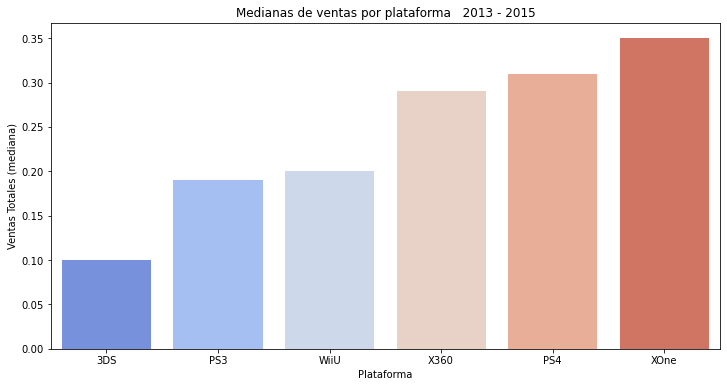

In [18]:
# Crear un barplot de medianas
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_top_summary, x='platform', y='median', palette='coolwarm')
plt.title('Medianas de ventas por plataforma   2013 - 2015')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (mediana)')
plt.show()

#### Vemos los resultados de ventas promedio para ese periodo.

## Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular. 
### Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.

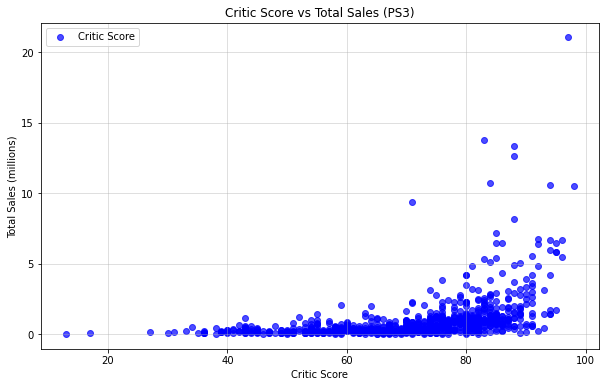

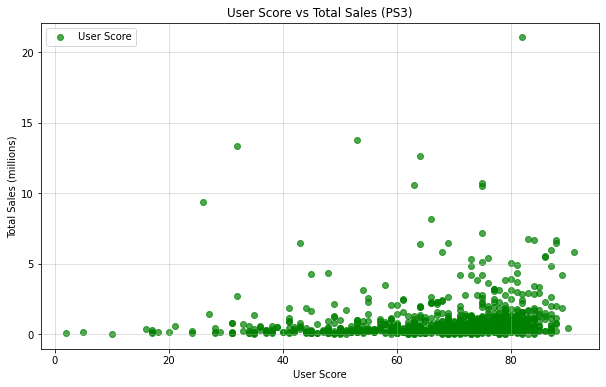

In [19]:
# Seleccionamos los datos para PS3
ps3 = df[df['platform']=='PS3']

# Gráfico para Critic Score vs Total Sales
plt.figure(figsize=(10, 6))
plt.scatter(ps3['critic_score'], ps3['total_sales'], alpha=0.7, color='blue', label='Critic Score')
plt.title('Critic Score vs Total Sales (PS3)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# Gráfico para User Score vs Total Sales
plt.figure(figsize=(10, 6))
plt.scatter(ps3['user_score'], ps3['total_sales'], alpha=0.7, color='green', label='User Score')
plt.title('User Score vs Total Sales (PS3)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()


In [20]:
# Correlación entre Critic Score y Total Sales
critic_corr = ps3['critic_score'].corr(ps3['total_sales'])

# Correlación entre User Score y Total Sales
user_corr = ps3['user_score'].corr(ps3['total_sales'])

print(f"Correlación entre Critic Score y Total Sales: {critic_corr:.2f}")
print(f"Correlación entre User Score y Total Sales: {user_corr:.2f}")


Correlación entre Critic Score y Total Sales: 0.43
Correlación entre User Score y Total Sales: 0.13


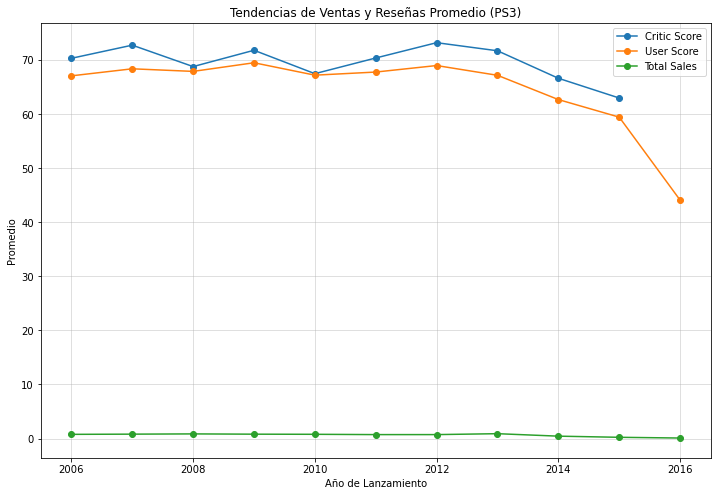

In [21]:
ps3_by_year = ps3.groupby('year_of_release').mean()

# Gráfico de tendencias a lo largo del tiempo
plt.figure(figsize=(12, 8))
plt.plot(ps3_by_year.index, ps3_by_year['critic_score'], label='Critic Score', marker='o')
plt.plot(ps3_by_year.index, ps3_by_year['user_score'], label='User Score', marker='o')
plt.plot(ps3_by_year.index, ps3_by_year['total_sales'], label='Total Sales', marker='o')
plt.title('Tendencias de Ventas y Reseñas Promedio (PS3)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Promedio')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


#### Creamos unos gráficos de disperción entre los datos de las críticas y las ventas totales de la plataforma PS3 y concluímos en que no hay relación entre las críticas y las ventas. Los números de correlación muestran números muy bajos como para decir que hay alguna relación entre estos datos y en la gráfica de ventas promedio vs críticas vemos que tampoco hay una relación. 

#### Compararemos ventas del mismo juego en otras plataformas.

In [22]:
# Hacemos una búsqueda de los juegos con más plataformas en el periodo de tiempo que seleccionamos anteriormente

sales_top.groupby('name')['platform'].nunique().sort_values(ascending = False).head(10)

name
ADVENTURE TIME FINN & JAKE INVESTIGATIONS    6
THE AMAZING SPIDER-MAN 2 (2014)              6
SKYLANDERS TRAP TEAM                         6
SKYLANDERS SWAP FORCE                        6
LEGO BATMAN 3 BEYOND GOTHAM                  6
LEGO JURASSIC WORLD                          6
LEGO MARVEL SUPER HEROES                     6
ANGRY BIRDS STAR WARS                        6
SKYLANDERS SUPERCHARGERS                     6
LEGO THE HOBBIT                              6
Name: platform, dtype: int64

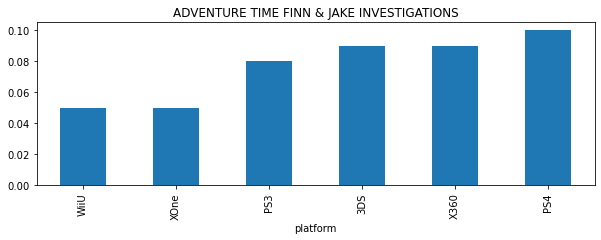

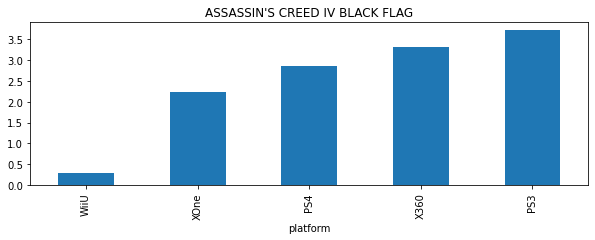

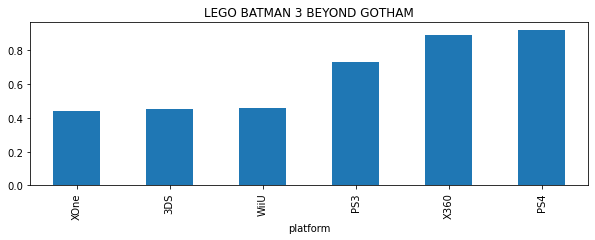

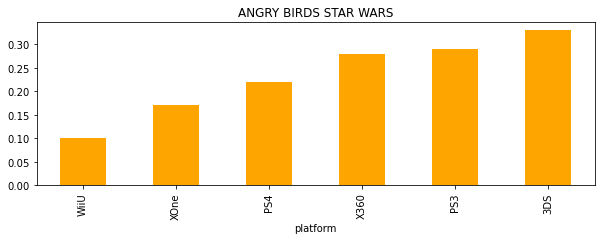

In [23]:
# Seleccionamos juegos multiplataforma y comparamos sus ventas por plataforma

adventureTime_sales = sales_top[sales_top['name'] == 'ADVENTURE TIME FINN & JAKE INVESTIGATIONS'].groupby('platform')['total_sales'].mean().reset_index().sort_values(by = 'total_sales', ascending = True)
assassinsCreed4_sales = sales_top[sales_top['name'] == "ASSASSIN'S CREED IV BLACK FLAG"].groupby('platform')['total_sales'].mean().reset_index().sort_values(by = 'total_sales', ascending = True)
legoBatman3_sales = sales_top[sales_top['name'] == "LEGO BATMAN 3 BEYOND GOTHAM"].groupby('platform')['total_sales'].mean().reset_index().sort_values(by = 'total_sales', ascending = True)
angryBirds_starWars_sales = sales_top[sales_top['name'] == "ANGRY BIRDS STAR WARS"].groupby('platform')['total_sales'].mean().reset_index().sort_values(by = 'total_sales', ascending = True)

adventureTime_sales.plot(
    y = 'total_sales',
    figsize=(10,3),
    x = 'platform',
    kind = 'bar',
    title = 'ADVENTURE TIME FINN & JAKE INVESTIGATIONS',
    legend = False,
    xlabel='platform'
)

assassinsCreed4_sales.plot(
    y = 'total_sales',
    figsize=(10,3),
    x = 'platform',
    kind = 'bar',
    title = "ASSASSIN'S CREED IV BLACK FLAG",
    legend = False,
    xlabel='platform'
)

legoBatman3_sales.plot(
    y = 'total_sales',
    figsize=(10,3),
    x = 'platform',
    kind = 'bar',
    title = "LEGO BATMAN 3 BEYOND GOTHAM",
    legend = False,
    xlabel='platform'
)

angryBirds_starWars_sales.plot(
    y = 'total_sales',
    figsize=(10,3),
    x = 'platform',
    kind = 'bar',
    title = "ANGRY BIRDS STAR WARS",
    legend = False,
    xlabel='platform',
    color = 'orange'
)

plt.show()

#### Vemos que no hay un comportamiento general de cómo se distribuyen las ventas por plataforma en los juegos en que en este periodo (2013-2015) se venden los juegos multiplataformas. Eso dependerá del juego en cuestión. Por ejemplo, Angry birds Starwars, tiene más ventas en plataformas que no son las más populares ni las que más ventas totales tienen registradas.

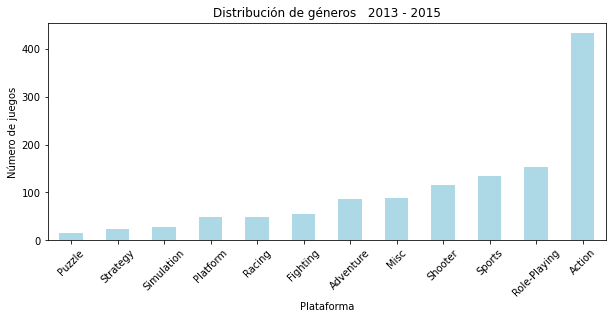

In [24]:
# Contamos cuántos juegos hay por género 

genre_counts = sales_top['genre'].value_counts().sort_values()
genre_counts.plot(
    kind='bar',
    figsize = (10,4),
    rot = 45,
    title = 'Distribución de géneros   2013 - 2015',
    xlabel = 'Plataforma',
    ylabel = 'Número de juegos',
    color = 'lightblue'
)

plt.show()

#### Viendo la distribución de juegos por género en este periodo podemos ver que el género que más juegos produjo fueron los Juegos de acción. 

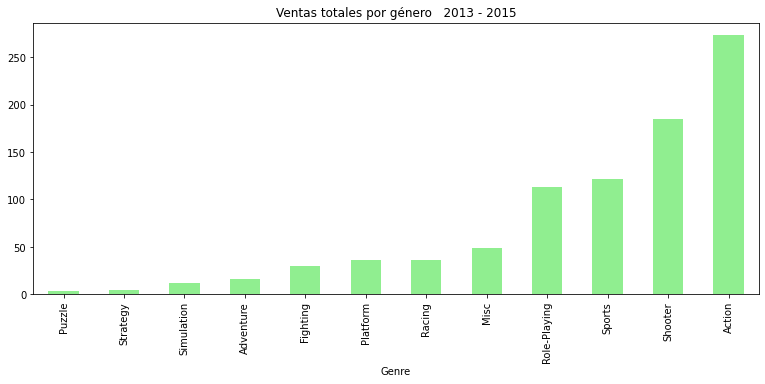

In [25]:
# Agrupamos y graficamos por género y ventas totales

genre_sales = sales_top.groupby('genre')['total_sales'].sum().reset_index().sort_values(by = 'total_sales')
genre_sales.plot(
    figsize = (13,5),
    kind = 'bar',
    xlabel = 'Genre',
    x = 'genre',
    legend = False, 
    title = 'Ventas totales por género   2013 - 2015',
    color = 'lightgreen'

)
plt.show()

#### Revisando los géneros más rentables vemos que los géneros qué más juegos crearon en ese periodo (2013 - 2015) coincide con que son los géneros que más dinero generan.
#### Creemos que la diferencia de ventas entre géneros que tienen muchas ventas vs los que venden menos se debe a que las plataformas se han enfocado en crear más este tipo de juegos. Y aunque los otros géneros siempre han tenido su público, al tener más oferta de juegos de Acción, shooter, deportes y Juegos de Rol, las personas han ido perdiendo el gusto por los otros géneros, dejándolos para consolas pasadas y no tanto para las nuevas.

# Paso 4. Crear un perfil de usuario para cada región

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16444 non-null  float64
 12  rating_expanded  16444 non-null  object 
 13  platform_group   16444 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


In [27]:
# Agrupamos los datos para cada región

usa = df[df['na_sales'] > 0]
europe = df[df['eu_sales'] > 0]
japan = df[df['jp_sales'] > 0]

In [28]:
# Creamos una función para mostrar las principales plataformas

def region_sales(region):
    region_platform = region.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False).head(5)
    top_platform = region_platform['platform'].tolist()
    return top_platform

print(f'Principales plataformas para EU: {region_sales(usa)}')
print(f'Principales plataformas para Europa: {region_sales(europe)}')
print(f'Principales plataformas para Japón: {region_sales(japan)}')

Principales plataformas para EU: ['PS2', 'X360', 'PS3', 'Wii', 'DS']
Principales plataformas para Europa: ['PS2', 'X360', 'PS3', 'Wii', 'PS']
Principales plataformas para Japón: ['PS3', 'PS2', 'X360', 'Wii', 'DS']


#### Las plataformas más populares por región parecen ser casi las mismas. Con excepción de que en EU y Europa la plataforma que más ventas tiene es el PS2, a diferencia de en Japón que el lider es el PS3. 
#### En Europa el DS no alcanza a entrar en el top5 de ventas como lo hace en EU y Japón, en su lugar está el PS

In [29]:
# Analizamos las ventas totales de cada region

region_sales = df[['na_sales', 'eu_sales', 'jp_sales']]
region_sales = region_sales.rename(columns={'na_sales':'USA', 'eu_sales': 'Europe', 'jp_sales': 'Japan'})
region_sales.describe()

,USA,Europe,Japan
count,16444.000000,16444.000000,16444.000000
mean,0.264121,0.145962,0.078487
std,0.818461,0.506724,0.311100
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000
75%,0.240000,0.110000,0.040000
max,41.360000,28.960000,10.220000


#### Estados unidos es la región que más ventas de videojuegos tiene, seguido de Europa y al último Japón

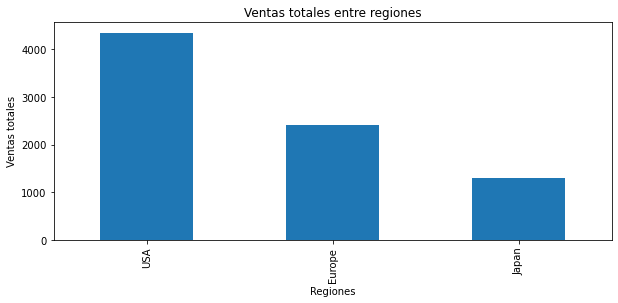

In [30]:
region_sales.sum().plot(
    kind='bar',
    figsize=(10,4),
    title = 'Ventas totales entre regiones',
    xlabel = 'Regiones',
    ylabel = 'Ventas totales'
)
plt.show()

In [31]:
# Creamos una función para mostrar los géneros principales por region

def region_genres(region):
    region_genre = region.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False).head(5)
    top_genre = region_genre['genre'].tolist()
    return top_genre

print(f'Principales géneros para EU: {region_genres(usa)}')
print(f'Principales géneros para Europa: {region_genres(europe)}')
print(f'Principales géneros para Japón: {region_genres(japan)}')

Principales géneros para EU: ['Action', 'Sports', 'Shooter', 'Platform', 'Role-Playing']
Principales géneros para Europa: ['Action', 'Sports', 'Shooter', 'Platform', 'Role-Playing']
Principales géneros para Japón: ['Action', 'Role-Playing', 'Shooter', 'Sports', 'Platform']


#### La diferencia más grande que percibimos en las preferencias de género por región son los juegos de Role-playing y cómo Japón prefiere estos géneros a diferencia de occidente. Las causas podrían ser varias, entre ellas la cultura de la región, por ejemplo, 
- Narrativa y personajes profundos: La cultura japonesa da mucha importancia a las historias elaboradas y personajes complejos. algo que los RPG suelen ofrecer.
- Estética visual: Los RPG japoneses, especialmente los JRPG (Japanese Role-Playing Games), a menudo tienen un estilo artístico influenciado por el anime y manga, lo que conecta con los intereses visuales de la audiencia local.
- Ética del esfuerzo colectivo: Los RPG suelen enfatizar la colaboración y el progreso a través del esfuerzo, valores que son centrales en la sociedad japonesa.

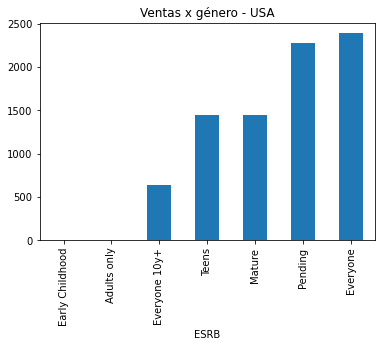

In [45]:
# Verificaremos las ventas por región y por ESRB

usa_rating_sales = usa.groupby('rating_expanded')['total_sales'].sum().reset_index().sort_values(by='total_sales')
usa_rating_sales.plot(
    kind='bar',
    title = 'Ventas x género - USA',
    x = 'rating_expanded',
    xlabel = 'ESRB',
    legend = False
)
plt.show()

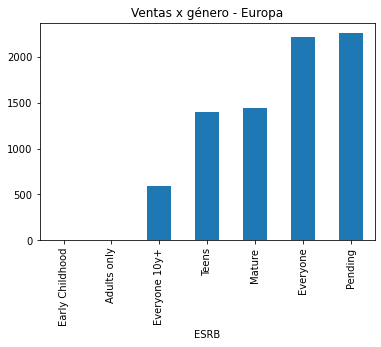

In [46]:
europe_rating_sales = europe.groupby('rating_expanded')['total_sales'].sum().reset_index().sort_values(by='total_sales')
europe_rating_sales.plot(
    kind='bar',
    title = 'Ventas x género - Europa',
    x = 'rating_expanded',
    xlabel = 'ESRB',
    legend = False
)
plt.show()

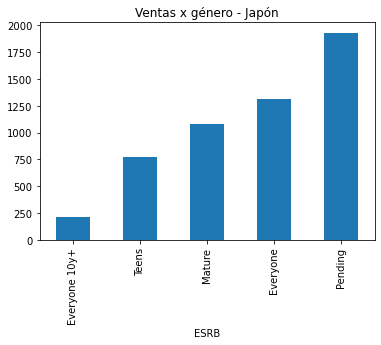

In [47]:
japan_rating_sales = japan.groupby('rating_expanded')['total_sales'].sum().reset_index().sort_values(by='total_sales')
japan_rating_sales.plot(
    kind='bar',
    title = 'Ventas x género - Japón',
    x = 'rating_expanded',
    xlabel = 'ESRB',
    legend = False
)
plt.show()

Las clasificaciones de ESRB parecen no afectar las ventas en ninguna de las regiones, ya que las ventas mayores vienen de juegos que tienen un rating pendiente según la ESRB.